# Naive Conformal Predictions -- How to run

# William Kiger

In [1]:
import os
import random
import numpy as np

#PyTorch imports
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.backends.cudnn as cudnn

import naive_conformal_prediction.naive_conformal_prediction as ncp
import naive_conformal_prediction.inference as inference

In [2]:
#load the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device = " + str(device))
    
model_path = r"model/resnet_18_derm_model_test_v2.pt"
model = torch.load(model_path)
# model.to(device)
model = torch.nn.DataParallel(model)  # wdk...for multi-gpu instances
# print(model)
#model to eval mode
_ = model.eval()
    
#calibration dataset prepared  --> have to pass path
root = r'data/validation_dataset'
validate_path = os.path.join(root, 'val')  
    
cmodel = ncp.NaiveConformalModel(model, validate_path, alpha=0.1)

Device = cuda:0


In [3]:
test_img = r'data\validation_dataset\val\folliculitis\258.jpg'
prediction_set = inference.NaiveCPredict(cmodel, test_img, print_bool=False)
print("Naive Prediction Set:")
print(prediction_set)
print("done")

Naive Prediction Set:
[('folliculitis', 0.30664086), ('allergic_contact_dermatitis', 0.17021301), ('psoriasis', 0.14460063), ('squamous_cell_carcinoma', 0.123341866), ('basal_cell_carcinoma', 0.10882064), ('lichen_planus', 0.10410077)]
done


Softmax Scores
Prediction 1 : folliculitis , Score:  0.30664086
Prediction 2 : allergic_contact_dermatitis , Score:  0.17021301
Prediction 3 : psoriasis , Score:  0.14460063
Prediction 4 : squamous_cell_carcinoma , Score:  0.123341866
Prediction 5 : basal_cell_carcinoma , Score:  0.10882064
Prediction 6 : lichen_planus , Score:  0.10410077
Prediction 7 : lupus_erythematosus , Score:  0.019745579
Prediction 8 : sarcoidosis , Score:  0.008525023
Prediction 9 : photodermatoses , Score:  0.0074582626
Prediction 10 : neutrophilic_dermatoses , Score:  0.00655338
Naive Prediction Set:
[('folliculitis', 0.30664086), ('allergic_contact_dermatitis', 0.17021301), ('psoriasis', 0.14460063), ('squamous_cell_carcinoma', 0.123341866), ('basal_cell_carcinoma', 0.10882064), ('lichen_planus', 0.10410077)]
done


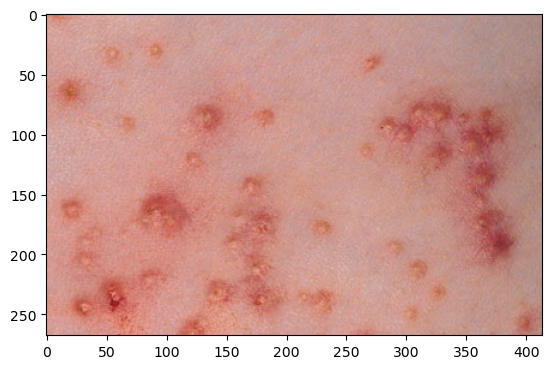

In [4]:
test_img = r'data\validation_dataset\val\folliculitis\258.jpg'
prediction_set = inference.NaiveCPredict(cmodel, test_img, print_bool=True)
print("Naive Prediction Set:")
print(prediction_set)
print("done")